In [26]:
import numpy as np
import pandas as pd

In [27]:
df = pd.read_csv('graduate.csv')

In [28]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [29]:
df.shape

(500, 9)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [31]:
# Option 1: Use inplace=True but don't assign the result
df.drop(columns=['Serial No.'], inplace=True)
df.head()

# Option 2: Don't use inplace=True and assign the result
# df = df.drop(columns=['Serial No.'])
# df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [32]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [33]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 1)

In [37]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

C:\Users\LAPTOP\anaconda3\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [71]:
model = Sequential()

model.add(Dense(7,activation = 'relu',input_dim = 7))
model.add(Dense(7,activation = 'relu'))
model.add(Dense(1,activation = 'linear'))

C:\Users\LAPTOP\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [72]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120 (480.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

In [73]:
model.compile(loss = 'mean_squared_error', optimizer = 'Adam')

In [74]:
history =model.fit(X_train_scaled, y_train, epochs = 200, validation_split =0.2)

Epoch 1/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.6305 - val_loss: 0.6229
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.5418 - val_loss: 0.5382
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.4669 - val_loss: 0.4645
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.3996 - val_loss: 0.3974
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.3392 - val_loss: 0.3353
Epoch 6/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.2831 - val_loss: 0.2787
Epoch 7/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.2319 - val_loss: 0.2267
Epoch 8/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1850 - val_loss: 0.1778
Epoch 9/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1411 - val_loss: 0.1336
Epoch 10/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1019 - val_loss: 0.0943
Epoch 11/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0681 - val_loss: 0.0600
Epoch 12/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

In [75]:
y_pred = model.predict(X_test_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step 


In [76]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8044162064972302

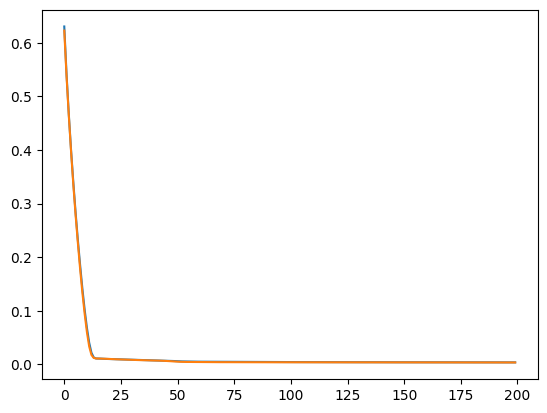

In [77]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])